<a href="https://colab.research.google.com/github/Jadeilson08/tcc-data-science/blob/master/tcc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Etapas:

## 1. coleta de dados
- [x] Obtenha os dados de preço histórico de Bitcoin e Ethereum em um formato de tabela (por exemplo, CSV).
- [x] Obtenha os dados do valor do dolar por dia

## 2. processar e tratar dados
- [x] Utilize a biblioteca Pandas para carregar e manipular os dados.

## 3. analisar e explorar dados
- [x] Utilize a biblioteca Matplotlib para plotar os dados e visualizar as tendências.
- [x] Unir DF's
- [x] Utilize a biblioteca de aprendizado de máquina scikit-learn para dividir os dados em conjuntos de treinamento e teste.
- [ ] Escolha um modelo de aprendizado de máquina apropriado para séries temporais (por exemplo, ARIMA, SARIMA, Prophet) e treine-o com os dados de treinamento.
- [ ] Faça previsões com o modelo treinado utilizando os dados de teste e avaliar a precisão do modelo.
- [ ] Utilize o modelo treinado para fazer previsões futuras.
- [ ] atualizar os inputs com dados mais recentes



In [196]:
# importando o data_reader
!pip install -q yfinance
import pandas as pd
from pandas_datareader import data as pdr
#import yfinance as yfin
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.graph_objs as go

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.ensemble import RandomForestRegressor

from sklearn.neural_network import MLPRegressor

#yfin.pdr_override()

In [197]:
# Bitcoin(BTC-USD)

#data inicial e final
start_date = '2021-01-01'
end_date = '2022-12-31'

# coletando os dataframe
df_bitcoin = pdr.get_data_yahoo('BTC-USD', start=start_date, end=end_date)

[*********************100%***********************]  1 of 1 completed


In [244]:
# o index de todos os dataframe ja sao as datas, sem necessidade de atualizar o indice
df_bitcoin.head()


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-01-01,28994.009766,29600.626953,28803.585938,29374.152344,29374.152344,40730301359
2021-01-02,29376.455078,33155.117188,29091.181641,32127.267578,32127.267578,67865420765
2021-01-03,32129.408203,34608.558594,32052.316406,32782.023438,32782.023438,78665235202
2021-01-04,32810.949219,33440.218750,28722.755859,31971.914062,31971.914062,81163475344
2021-01-05,31977.041016,34437.589844,30221.187500,33992.429688,33992.429688,67547324782


In [199]:
#verificando se tem algum valor nan ou null
df_bitcoin.isna().any()

Open         False
High         False
Low          False
Close        False
Adj Close    False
Volume       False
dtype: bool

In [200]:
''' 
  etapa 2
  a cotacao do dolar com o valor de abertura e fechamento esta disponivel em csv
  no seguinte endereco
  https://br.investing.com/currencies/usd-brl-historical-data

'''

' \n  etapa 2\n  a cotacao do dolar com o valor de abertura e fechamento esta disponivel em csv\n  no seguinte endereco\n  https://br.investing.com/currencies/usd-brl-historical-data\n\n'

In [201]:
df_dolar = pd.read_csv('https://raw.githubusercontent.com/Jadeilson08/tcc-data-science/master/USD_BRL_TEST_20210101_20221231.csv')

df_dolar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Data      520 non-null    object
 1   Último    520 non-null    object
 2   Abertura  520 non-null    object
 3   Máxima    520 non-null    object
 4   Mínima    520 non-null    object
 5   Vol.      508 non-null    object
 6   Var%      520 non-null    object
dtypes: object(7)
memory usage: 28.6+ KB


In [202]:
#func renomeando colunas para ingles

def rename_and_sort_columns(df):
  df = df.rename(columns={'Data': 'Date','Último': 'dolar_close', 'Abertura': 'dolar_open', 'Máxima': 'dolar_high', 'Mínima': 'dolar_low', 'Vol.' : 'dolar_volume', 'Var%': 'dolar_variation'})

  #convertando BR para US
  columns = ['dolar_close', 'dolar_open', 'dolar_high', 'dolar_low']

  for column in columns:
    df[column] = df[column].apply(lambda x: x.replace(',', '.')).astype(np.float64)

  df['Date'] = pd.to_datetime(df['Date'], format='%d.%m.%Y')

  #alterando o index para Data
  df = df.set_index('Date')

  df.sort_values('Date')
  return df

df_dolar = rename_and_sort_columns(df_dolar)

In [203]:
# visualizando dados vazios 
print(df_dolar.isna().any())
print(df_dolar.isna().sum())
df_dolar['dolar_volume'].head()

dolar_close        False
dolar_open         False
dolar_high         False
dolar_low          False
dolar_volume        True
dolar_variation    False
dtype: bool
dolar_close         0
dolar_open          0
dolar_high          0
dolar_low           0
dolar_volume       12
dolar_variation     0
dtype: int64


Date
2022-12-29    122,63K
2022-12-28    110,39K
2022-12-27    120,92K
2022-12-26     69,65K
2022-12-23    164,08K
Name: dolar_volume, dtype: object

In [204]:
#funcao para remover k 
def remove_k(numero_k):
  return float(numero_k.replace(',', '.').replace('K', '').replace('k',''))

#funcao para add k
def add_k(numero):
  return f"{str(numero).replace('.', ',')}K"

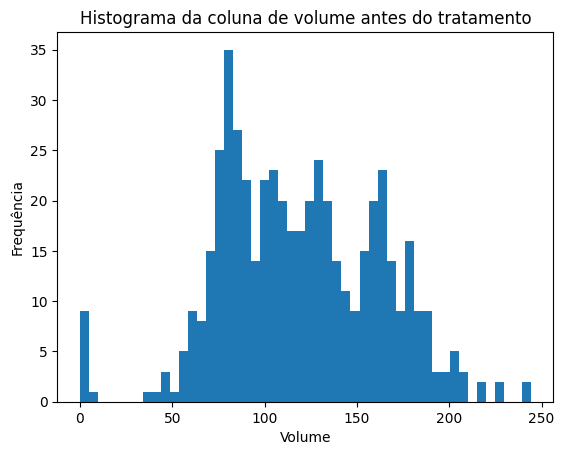

In [205]:
#plotando hist para analise de dados
dolar_volume = df_dolar['dolar_volume'].dropna().apply(remove_k)
plt.hist(dolar_volume, bins=50)
plt.title('Histograma da coluna de volume antes do tratamento')
plt.xlabel('Volume')
plt.ylabel('Frequência')
plt.show()

In [206]:
dolar_volume = dolar_volume.sort_values()

# Imprimindo as medidas estatísticas
print(dolar_volume.describe())

count    508.000000
mean     119.247205
std       42.935431
min        0.000000
25%       86.510000
50%      115.960000
75%      154.475000
max      244.220000
Name: dolar_volume, dtype: float64


In [207]:
# como ha valores muitos extremos e a media e mediana sao valores proximos
# sera adotado a mediana como valor para efetuar preencher as linhas faltantes
# da coluna df_dolar['dolar_volume']

median_k = add_k(dolar_volume.median())

df_dolar['dolar_volume'].fillna(median_k, inplace=True)

print(df_dolar.isna().any())

dolar_close        False
dolar_open         False
dolar_high         False
dolar_low          False
dolar_volume       False
dolar_variation    False
dtype: bool


In [208]:
'''fim etapa 2 '''

'fim etapa 2 '

In [209]:
'''
  etapa 4:

  Utilizar a biblioteca Matplotlib para plotar os dados e visualizar as tendências.
'''

'\n  etapa 4:\n\n  Utilizar a biblioteca Matplotlib para plotar os dados e visualizar as tendências.\n'

In [210]:
#plotando cnadlestick bitcoin
fig_bitcoin = go.Figure(data=[go.Candlestick(x=df_bitcoin.index.values,
                                             open=df_bitcoin['Open'],
                                             close=df_bitcoin['Close'],
                                             high=df_bitcoin['High'],
                                             low=df_bitcoin['Low'])])

fig_bitcoin.update_layout(
    title='Histórico de preços do Bitcoin',
    yaxis_title='Preço (USD)',
    xaxis_title='Data')

fig_bitcoin.show()

In [211]:
#plotando cnadlestick dolar
fig_dolar = go.Figure(data=[go.Candlestick(x=df_dolar.index.values,
                                             open=df_dolar['dolar_open'],
                                             close=df_dolar['dolar_close'],
                                             high=df_dolar['dolar_high'],
                                             low=df_dolar['dolar_low'])])

fig_dolar.update_layout(
    title='Histórico de preços do Dolar',
    yaxis_title='Preço (USD)',
    xaxis_title='Data')

fig_dolar.show()

In [212]:
''' fim etapa 4 '''

' fim etapa 4 '

In [213]:
'''
  etapa 5
  unir DF's
'''



"\n  etapa 5\n  unir DF's\n"

In [214]:
df_bitcoin_dolar = pd.merge(df_bitcoin, df_dolar, on='Date')

In [215]:
df_bitcoin_dolar.head()

,Open,High,Low,Close,Adj Close,Volume,dolar_close,dolar_open,dolar_high,dolar_low,dolar_volume,dolar_variation
Date,,,,,,,,,,,,
2021-01-01,28994.009766,29600.626953,28803.585938,29374.152344,29374.152344,40730301359,5.1940,5.1940,5.1940,5.1940,"115,96000000000001K","0,00%"
2021-01-04,32810.949219,33440.218750,28722.755859,31971.914062,31971.914062,81163475344,5.2968,5.1351,5.2972,5.1197,"163,79K","1,98%"
2021-01-05,31977.041016,34437.589844,30221.187500,33992.429688,33992.429688,67547324782,5.2854,5.2955,5.3547,5.2515,"179,01K","-0,22%"
2021-01-06,34013.613281,36879.699219,33514.035156,36824.363281,36824.363281,75289433811,5.3139,5.2863,5.3597,5.2318,"225,65K","0,54%"
2021-01-07,36833.875000,40180.367188,36491.191406,39371.042969,39371.042969,84762141031,5.4101,5.3169,5.4187,5.2989,"169,63K","1,81%"


In [216]:
#grafico de series temporais, com o valor do preço do bitcoin em relacao ao dolar
lines = [go.Scatter(x=df_bitcoin_dolar.index, y=df_bitcoin_dolar['Close'], mode='lines', name='Bitcoin'),
         go.Scatter(x=df_bitcoin_dolar.index, y=df_bitcoin_dolar['dolar_close'], mode='lines', name='Dolar')]

layout = go.Layout(
    title='Preço do Bitcoin em relação ao Dólar',
    yaxis_title='Preço',
    xaxis_title='Data'
)

fig = go.Figure(data=lines, layout=layout)
fig.show()

In [217]:
# cálculo de estatísticas descritivas para os preços do bitcoin e do dólar
print('Estatísticas Descritivas - Bitcoin:')
print(df_bitcoin_dolar['Close'].describe())

print('\nEstatísticas Descritivas - Dólar:')
print(df_bitcoin_dolar['dolar_close'].describe())

Estatísticas Descritivas - Bitcoin:
count      520.000000
mean     37863.218517
std      13850.356437
min      15787.284180
25%      23200.710938
50%      38966.289062
75%      47725.427734
max      67566.828125
Name: Close, dtype: float64

Estatísticas Descritivas - Dólar:
count    520.000000
mean       5.279418
std        0.247772
min        4.592800
25%        5.146125
50%        5.268550
75%        5.443550
max        5.875500
Name: dolar_close, dtype: float64


In [218]:
# correlação entre os preços do bitcoin e do dólar
# Correlação positiva: Significa que os preços do dólar e do bitcoin tendem a subir ou cair juntos. Se o dólar sobe, o bitcoin também pode subir, e vice-versa.
# Correlação negativa: Significa que os preços do dólar e do bitcoin tendem a se mover em direções opostas. Se o dólar sobe, o bitcoin pode cair, e vice-versa.
# Correlação neutra: Significa que não há uma relação clara entre os movimentos de preço do dólar e do bitcoin. Eles podem se mover de forma independente, sem uma relação significativa.
correlation = df_bitcoin_dolar['Close'].corr(df_bitcoin_dolar['dolar_close'])
print('Correlação entre os preços do Bitcoin e do Dólar:', correlation)


Correlação entre os preços do Bitcoin e do Dólar: 0.4187605196330928


In [219]:
# criando indicadores

# func médias móveis para identificar tendências

def identify_trends(df):
  # média móvel simples de 30 dias para o preço do bitcoin
  df['sma30_bitcoin'] = df['Close'].rolling(window=30).mean()

  # média móvel simples de 30 dias para o preço do dólar
  df['sma30_dolar'] = df['dolar_close'].rolling(window=30).mean()


  # calcular a diferença entre o preço de fechamento do bitcoin e do dólar
  df['diff_bitcoin_dolar'] = df['Close'] - df['dolar_close']

  # calcular a diferença percentual entre o preço de fechamento do bitcoin e do dólar
  df['diff_perc_bitcoin_dolar'] = (df['Close'] / df['dolar_close']) - 1
  return

identify_trends(df_bitcoin_dolar)

In [220]:
# verificando se nao tem nenhum dado vazio
df_bitcoin_dolar.isna().any()
df_bitcoin_dolar.head()

,Open,High,Low,Close,Adj Close,Volume,dolar_close,dolar_open,dolar_high,dolar_low,dolar_volume,dolar_variation,sma30_bitcoin,sma30_dolar,diff_bitcoin_dolar,diff_perc_bitcoin_dolar
Date,,,,,,,,,,,,,,,,
2021-01-01,28994.009766,29600.626953,28803.585938,29374.152344,29374.152344,40730301359,5.1940,5.1940,5.1940,5.1940,"115,96000000000001K","0,00%",NaN,NaN,29368.958344,5654.400913
2021-01-04,32810.949219,33440.218750,28722.755859,31971.914062,31971.914062,81163475344,5.2968,5.1351,5.2972,5.1197,"163,79K","1,98%",NaN,NaN,31966.617262,6035.081042
2021-01-05,31977.041016,34437.589844,30221.187500,33992.429688,33992.429688,67547324782,5.2854,5.2955,5.3547,5.2515,"179,01K","-0,22%",NaN,NaN,33987.144287,6430.382618
2021-01-06,34013.613281,36879.699219,33514.035156,36824.363281,36824.363281,75289433811,5.3139,5.2863,5.3597,5.2318,"225,65K","0,54%",NaN,NaN,36819.049381,6928.818642
2021-01-07,36833.875000,40180.367188,36491.191406,39371.042969,39371.042969,84762141031,5.4101,5.3169,5.4187,5.2989,"169,63K","1,81%",NaN,NaN,39365.632869,7276.322595


In [221]:
#como tem valor nan, vou tratar usando a interpolacao
#repetindo o primeiro valor valido para as linhas com nan
def first_valid(df):
  df['sma30_bitcoin'] = df['sma30_bitcoin'].interpolate(limit_direction='backward')

  df['sma30_dolar'] = df['sma30_dolar'].interpolate(limit_direction='backward')
  return

# first_valid(df_bitcoin_dolar)
df_bitcoin_dolar = df_bitcoin_dolar.dropna()

In [222]:
# Plot das médias móveis e dos preços originais
lines = [go.Scatter(x=df_bitcoin_dolar.index, y=df_bitcoin_dolar['sma30_bitcoin'], mode='lines', name='Preço Bitcoin'),
         go.Scatter(x=df_bitcoin_dolar.index, y=df_bitcoin_dolar['sma30_dolar'], mode='lines', name='Preço Dolar')]

layout = go.Layout(
    title='Preço do Bitcoin em relação ao Dólar',
    yaxis_title='Preço',
    xaxis_title='Data'
)

fig = go.Figure(data=lines, layout=layout)
fig.show()

In [223]:
#modelo de aprendizado

#separa os dados em conjuntos de treinamento e teste

X = df_bitcoin_dolar[['sma30_bitcoin', 'sma30_dolar', 'diff_bitcoin_dolar', 'diff_perc_bitcoin_dolar']] # variáveis independentes
y = df_bitcoin_dolar['Close'] # variável dependente (preço do bitcoin)

#random_state eh apenas uma seed que sera usado pela a funcao de treinamento 
#do sckit-learning para gerar a divisao dos dados em conjuntos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


modelo usando regressao linear

In [224]:
# treinar o modelo de regressão linear
model_linear_regression = LinearRegression()
model_linear_regression.fit(X_train, y_train)

# fazer treinamento do preço do bitcoin
y_pred_train_lr = model_linear_regression.predict(X_train)
y_pred_test_lr = model_linear_regression.predict(X_test)

# avaliar o desempenho do modelo usando o erro médio quadrático
mse_train_lr = mean_squared_error(y_train, y_pred_train_lr)
mse_test_lr = mean_squared_error(y_test, y_pred_test_lr)

#calculando coeficiente de determinação (R2 - quanto mais perto de 1 melhor) LinearRegression
r2_linear_regression = r2_score(y_test, y_pred_test_lr)

print('Erro médio quadrático (conjunto de treinamento):', mse_train_lr)
print('Erro médio quadrático (conjunto de teste):', mse_test_lr)
print("R2: ", r2_linear_regression)

Erro médio quadrático (conjunto de treinamento): 0.002109010076607529
Erro médio quadrático (conjunto de teste): 0.002186164512401811
R2:  0.9999999999884716


modelo usando Random Forest


In [225]:
# criando o modelo de Random Forest
model_random_forest_regressor = RandomForestRegressor(n_estimators=5, random_state=42)
model_random_forest_regressor.fit(X_train, y_train)

# fazer treinamento do preço do bitcoin
y_pred_train_rfr = model_random_forest_regressor.predict(X_train)
y_pred_test_rfr = model_random_forest_regressor.predict(X_test)

# avaliar o desempenho do modelo usando o erro médio quadrático
mse_train_rfr = mean_squared_error(y_train, y_pred_train_rfr)
mse_test_rfr = mean_squared_error(y_test, y_pred_test_rfr)

#calculando coeficiente de determinação (R2 - quanto mais perto de 1 melhor) RandomForestRegressor
r2_rfr = r2_score(y_test, y_pred_test_rfr)

print('Erro médio quadrático (conjunto de treinamento):', mse_train_rfr)
print('Erro médio quadrático (conjunto de teste):', mse_test_rfr)
print("R2: ", r2_rfr)

Erro médio quadrático (conjunto de treinamento): 20094.77749090015
Erro médio quadrático (conjunto de teste): 22725.676950460525
R2:  0.9998801594843432


In [226]:
# # Importar as bibliotecas necessárias
# from sklearn.tree import export_graphviz
# import graphviz

# # Extrair uma árvore de decisão do modelo de Random Forest
# tree = model_random_forest_regressor.estimators_[0]  # Substitua "modelo_rf" pelo nome do seu modelo de Random Forest

# # Exportar a árvore de decisão para um arquivo .dot
# dot_data = export_graphviz(tree, out_file=None, filled=True, rounded=True, special_characters=True)

# graph = graphviz.Source(dot_data)

# # Visualize a árvore em formato de imagem (requer que a biblioteca graphviz esteja instalada)
# graph.render('arvore', view=True)

In [227]:
# criando o modelo de regressao neural
#ao usar menos neuronios e/ou mais camadas o coeficiente(R2) pendia para valores negativos
layer = (25, 25, 25)
model_random_mlp_regressor = MLPRegressor(hidden_layer_sizes=layer, activation='relu', solver='adam', random_state=42)
model_random_mlp_regressor.fit(X_train, y_train)

# fazer treinamento do preço do bitcoin
y_pred_train_mlp_regressor = model_random_mlp_regressor.predict(X_train)
y_pred_test_mlp_regressor = model_random_mlp_regressor.predict(X_test)

# avaliar o desempenho do modelo usando o erro médio quadrático
mse_train_mlp_regressor = mean_squared_error(y_train, y_pred_train_mlp_regressor)
mse_test_mlp_regressor = mean_squared_error(y_test, y_pred_test_mlp_regressor)

#calculando coeficiente de determinação (R2 - quanto mais perto de 1 melhor) regressao neural
r2_mlp_regressor = r2_score(y_test, y_pred_test_mlp_regressor)

print('Erro médio quadrático (conjunto de treinamento):', mse_train_mlp_regressor)
print('Erro médio quadrático (conjunto de teste):', mse_test_mlp_regressor)
print("R2: ", r2_mlp_regressor)

Erro médio quadrático (conjunto de treinamento): 4920513.4894329915
Erro médio quadrático (conjunto de teste): 5622225.593256483
R2:  0.9703520200650827


Com base nos valores do Mean Squared Error (MSE) e do coeficiente de determinação (R2) que você forneceu, parece que o modelo de Regressão Linear tem um desempenho significativamente melhor em relação ao Random Forest para o seu conjunto de dados.

O MSE é uma métrica que avalia a média dos erros quadráticos do modelo, sendo que um valor menor indica melhor ajuste aos dados. No seu caso, o MSE da Regressão Linear é extremamente baixo (0.015209712200605399), o que indica que esse modelo apresenta uma menor dispersão dos erros em relação aos dados observados.

Além disso, o coeficiente de determinação (R2) é uma métrica que varia de 0 a 1, sendo que um valor próximo de 1 indica que o modelo explica uma grande proporção da variabilidade dos dados. No seu caso, o R2 da Regressão Linear é muito próximo de 1 (0.9999999999327274), o que indica que esse modelo explica quase toda a variação dos dados observados.

Portanto, com base nessas métricas, a Regressão Linear parece ser a melhor opção entre os dois modelos para o seu problema específico. No entanto, é importante considerar outros fatores, como a adequação do modelo aos objetivos e requisitos do seu problema, a interpretabilidade do modelo, a escalabilidade, o tempo de treinamento e inferência, e outros aspectos relevantes antes de tomar uma decisão final sobre qual modelo de machine learning utilizar.

O coeficiente de determinação (R2) é uma métrica que varia de 0 a 1, e é usada para avaliar o quão bem um modelo de regressão se ajusta aos dados observados. No entanto, em alguns casos, o R2 pode assumir um valor negativo.

Um R2 negativo indica que o modelo de regressão não está ajustando bem aos dados e pode ser pior do que um simples modelo de referência, como a média dos valores observados. Em outras palavras, o modelo está prevendo os valores de forma tão inadequada que seu desempenho é pior do que se simplesmente usássemos a média dos valores observados como uma previsão.

R2 negativo pode ocorrer quando o modelo está fazendo previsões que são muito piores do que a média dos valores observados, indicando uma má qualidade do ajuste do modelo aos dados. É importante considerar as causas potenciais de um R2 negativo, como dados ruidosos, subamostragem inadequada, variáveis inadequadas ou inadequação do próprio modelo de regressão, e reavaliar a escolha do modelo e a qualidade dos dados em tais situações.

In [228]:
'''FAZENDO A PREVISAO'''

'FAZENDO A PREVISAO'

In [229]:
'''coletando o df do bitcoin'''

#data inicial e final
start_date = '2023-01-01'
end_date = '2023-05-02'

# coletando os dataframe
df_bitcoin_pred = pdr.get_data_yahoo('BTC-USD', start=start_date, end=end_date)

[*********************100%***********************]  1 of 1 completed


In [230]:
'''coletando o dolar'''
df_dolar_pred = pd.read_csv('https://raw.githubusercontent.com/Jadeilson08/tcc-data-science/master/USD_BRL_PRED_20230101_20230501.csv')

df_dolar_pred = rename_and_sort_columns(df_dolar_pred)
print(df_dolar_pred.isna().any())

dolar_close        False
dolar_open         False
dolar_high         False
dolar_low          False
dolar_volume        True
dolar_variation    False
dtype: bool


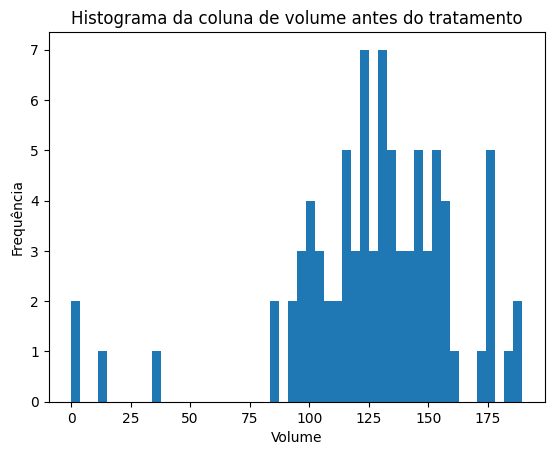

In [231]:
dolar_volume_pred = df_dolar_pred['dolar_volume'].dropna().apply(remove_k)
plt.hist(dolar_volume_pred, bins=50)
plt.title('Histograma da coluna de volume antes do tratamento')
plt.xlabel('Volume')
plt.ylabel('Frequência')
plt.show()

In [232]:
dolar_volume_pred = dolar_volume_pred.sort_values()

# Imprimindo as medidas estatísticas
print(dolar_volume_pred.describe())

count     85.000000
mean     127.108706
std       35.704041
min        0.060000
25%      113.480000
50%      130.120000
75%      147.800000
max      189.340000
Name: dolar_volume, dtype: float64


In [233]:
median_k = add_k(dolar_volume_pred.median())

df_dolar_pred['dolar_volume'].fillna(median_k, inplace=True)

print(df_dolar_pred.isna().any())

dolar_close        False
dolar_open         False
dolar_high         False
dolar_low          False
dolar_volume       False
dolar_variation    False
dtype: bool


In [234]:
'''unindo os df pred'''

'unindo os df pred'

In [235]:
df_bitcoin_dolar_pred = pd.merge(df_bitcoin_pred, df_dolar_pred, on='Date')
df_bitcoin_dolar_pred.head()

,Open,High,Low,Close,Adj Close,Volume,dolar_close,dolar_open,dolar_high,dolar_low,dolar_volume,dolar_variation
Date,,,,,,,,,,,,
2023-01-02,16625.509766,16759.343750,16572.228516,16688.470703,16688.470703,12097775227,5.3633,5.2865,5.3671,5.2861,"84,04K","1,46%"
2023-01-03,16688.847656,16760.447266,16622.371094,16679.857422,16679.857422,13903079207,5.4797,5.3638,5.4802,5.3396,"188,23K","2,17%"
2023-01-04,16680.205078,16964.585938,16667.763672,16863.238281,16863.238281,18421743322,5.4312,5.4799,5.4799,5.4248,"175,09K","-0,89%"
2023-01-05,16863.472656,16884.021484,16790.283203,16836.736328,16836.736328,13692758566,5.3509,5.4315,5.4315,5.3478,"148,32K","-1,48%"
2023-01-06,16836.472656,16991.994141,16716.421875,16951.968750,16951.968750,14413662913,5.2254,5.3514,5.3697,5.2186,"154,80K","-2,35%"


In [236]:
identify_trends(df_bitcoin_dolar_pred)
print(df_bitcoin_dolar_pred.isna().any())

Open                       False
High                       False
Low                        False
Close                      False
Adj Close                  False
Volume                     False
dolar_close                False
dolar_open                 False
dolar_high                 False
dolar_low                  False
dolar_volume               False
dolar_variation            False
sma30_bitcoin               True
sma30_dolar                 True
diff_bitcoin_dolar         False
diff_perc_bitcoin_dolar    False
dtype: bool


In [237]:
#first_valid(df_bitcoin_dolar_pred)
df_bitcoin_dolar_pred = df_bitcoin_dolar_pred.dropna()

In [238]:
''' usando o modelo de aprendizado'''

' usando o modelo de aprendizado'

In [239]:
X_pred = df_bitcoin_dolar_pred[['sma30_bitcoin', 'sma30_dolar', 'diff_bitcoin_dolar', 'diff_perc_bitcoin_dolar']]
Y_pred = df_bitcoin_dolar_pred['Close']

In [240]:
future_pred = model_linear_regression.predict(X_pred)

In [241]:
# future_indices = list(range(len(X) + 1, len(X) + 1 + len(X_pred)))

# # Create trace for actual Bitcoin values
# trace_actual = go.Scatter(
#     x=list(range(len(X))),
#     y=y,
#     mode='lines',
#     name='Actual Values'
# )

# # Create trace for future predictions
# trace_predictions = go.Scatter(
#     x=future_indices,
#     y=future_pred,
#     mode='lines',
#     name='Future Predictions'
# )

# # Create data array for the plot
# data = [trace_actual, trace_predictions]

# # Create layout for the plot
# layout = go.Layout(
#     title='Future Predictions of Bitcoin Value',
#     xaxis=dict(title='Period'),
#     yaxis=dict(title='Bitcoin Value')
# )

# # Create figure object
# fig = go.Figure(data=data, layout=layout)

# # Show the plot
# fig.show()

# df_bitcoin_dolar_pred.to_csv('bitcon.csv', index=True)
# myDf = pd.DataFrame(future_pred)
# myDf.to_csv('futu.csv', index=True)

In [242]:
# Datas futuras
from datetime import datetime, timedelta
last_date = pd.to_datetime(X_pred.index[-1])  # Última data do seu conjunto de dados X
future_dates = pd.date_range(start=last_date + timedelta(days=1), periods=180, freq='D')  # Datas futuras para 6 períodos (dias) com frequência diária

# Previsões futuras do modelo
#future_predictions = model.predict(X_new)  # Substitua X_new pelas suas novas amostras de entrada para previsão

# Criar trace para previsões futuras
trace_future_predictions = go.Scatter(
    x=future_dates,
    y=future_pred,
    mode='lines',
    name='Future Predictions'
)

# Criar trace para dados históricos
trace_historical_data = go.Scatter(
    x=X_pred.index,
    y=Y_pred,
    mode='lines',
    name='Historical Data'
)

# Data array para o gráfico
data = [trace_future_predictions]

# Layout para o gráfico
layout = go.Layout(
    title='Bitcoin Future Predictions',
    xaxis=dict(title='Date'),
    yaxis=dict(title='Bitcoin Value')
)

# Criar figura
fig = go.Figure(data=data, layout=layout)

# Exibir o gráfico
fig.show()
print(X_pred.index[-1])

2023-05-01 00:00:00


In [243]:
data=[go.Candlestick(x=future_dates)]

fig_future_bitcoin_dolar = go.Figure(data=[])